# Quantified Self
By: Gavin McClure-Coleman & Sam Allen

## Introduction

For our project, we have decided to explore our Steam account data. Steam is a a digital distribution platform developed by Valve, primarily used for buying, downloading, and playing PC video games.

Using the Steam Web API through https://steamcommunity.com/dev and more specifically https://developer.valvesoftware.com/wiki/Steam_Web_API we are able to obtain all kinds of interesting stats about ourselves like the games we own, have played the most, genres of those games, and much more.

We chose this topic because we have both been playing videogames our whole lives and thought it would be super cool to look into all of the data our Steam accounts have accumulated over the many years they have existed! So in short we like videogames!

<img src="cat_images/CatGamer.jpg" alt="CatGamer" width="200"/>

###### (The first of many cats, hope you like them! 😸)

We then decided to pull information about those games from the Steam Store API to compare our own data to some of the public information.

Requests were made to:

* https://store.steampowered.com/api/appdetails?appids={appid}&cc=us&l=en
* https://store.steampowered.com/appreviews/{appid}?json=1&language=all

The main goal of our project is to see what interesting predictions we can make about steam games or ourselves based off of the data accumulated from our accounts and the store page. The main, most interesting comparision we will touch on later will be playtime vs. public review sentiment. What that means is that we will try to predict if a game was rated well or poorly by steam users, based on the data on our personal accounts about that game (like playtime or price).



## 1) Get the personal steam account data

First, we need to make some API requests to get our data, we will be cleaning as we obtain this data to prep for our later exploratory data analysis.

To start, we will make a request to get all games owned on both of our steam accounts, and then merge the data

We can then set up the data by sorting by playtime, setting the index to game name, filling NaNs and a couple other techniques outlined in the comments of the code below


In [1]:
import utils
import pandas as pd


# NOTE: REMOVE API KEYS AND STEAM IDs FROM THE CODE NOW THAT WE HAVE THE CSVs, ONLY ADD BACK IF WE NEED TO CALL FUNCTIONS AGAIN
# gavin_api_key = ""
# sam_api_key = ""
# gavin_steam_id = ""
# sam_steam_id = ""

# commented out after first call because we now have the csvs
# sam_games_df = utils.get_user_games(sam_api_key, sam_steam_id, "Sam")
# gavin_games_df = utils.get_user_games(gavin_api_key, gavin_steam_id, "Gavin")

# Use csvs to avoid longer run times
sam_games_df = pd.read_csv("Sam_games.csv")
gavin_games_df = pd.read_csv("Gavin_games.csv")


df = utils.merge_players(sam_games_df, gavin_games_df)

df.head()


,appid,playtime_forever_Sam,img_icon_url_Sam,has_community_visible_stats_Sam,playtime_windows_forever_Sam,playtime_mac_forever_Sam,playtime_linux_forever_Sam,playtime_deck_forever_Sam,rtime_last_played_Sam,content_descriptorids_Sam,...,has_community_visible_stats_Gavin,playtime_windows_forever_Gavin,playtime_mac_forever_Gavin,playtime_linux_forever_Gavin,playtime_deck_forever_Gavin,rtime_last_played_Gavin,content_descriptorids_Gavin,playtime_disconnected_Gavin,has_leaderboards_Gavin,playtime_2weeks_Gavin
Game,,,,,,,,,,,,,,,,,,,,,
Rust,252490,56285.0,820be4782639f9c4b64fa3ca7e6c26a95ae4fd1c,True,56285.0,0.0,0.0,0.0,1.729369e+09,"[1, 2, 5]",...,True,64159.0,0.0,0.0,0.0,1.736583e+09,"[1, 2, 5]",0.0,NaN,0.0
Destiny 2,1085660,6822.0,fce050d63f0a2f8eb51b603c7f30bfca2a301549,True,6822.0,0.0,0.0,0.0,1.728678e+09,NaN,...,True,149294.0,0.0,0.0,0.0,1.745990e+09,NaN,0.0,NaN,591.0
Terraria,105600,57014.0,858961e95fbf869f136e1770d586e0caefd4cfac,True,51545.0,0.0,0.0,0.0,1.739931e+09,NaN,...,True,16965.0,0.0,0.0,0.0,1.745117e+09,NaN,0.0,NaN,5.0
Counter-Strike 2,730,4632.0,8dbc71957312bbd3baea65848b545be9eae2a355,True,1163.0,0.0,0.0,0.0,1.730015e+09,"[2, 5]",...,True,10.0,0.0,0.0,0.0,1.644630e+09,"[2, 5]",0.0,NaN,0.0
Tom Clancy's Rainbow Six Siege,359550,58551.0,624745d333ac54aedb1ee911013e2edb7722550e,NaN,29019.0,0.0,0.0,0.0,1.712614e+09,NaN,...,NaN,6793.0,0.0,0.0,0.0,1.744437e+09,NaN,0.0,NaN,0.0


## 2) Data Cleaning
From the first 5 instances of our first dataset, we can see a couple of columns that aren't important to keep.  
Specifically, we will be getting rid of the following columns:
 * img_icon_url
 * has_community_visible_stats
 * playtime_windows_forever
 * playtime_mac_forever
 * playtime_linux_forever
 * playtime_deck_forever
 * content_descriptorids (describes the maturity ratings of the game)
 * playtime_disconnected
 * has_leaderboards

For clarity, the column rtime_last_played represents the **Unix timestamp** of the last time the game was played. In other words, it is the number of seconds since January 1, 1970 (the Unix epoch)
 * To convert from unix to a more readable format, we can use the `datetime.fromtimestamp(timestamp)` using the `from datetime import datetime` library.


In [2]:
df = utils.drop_columns(df, "Sam")
df = utils.drop_columns(df, "Gavin")
df.shape

(486, 7)

In [3]:
df.head()

,appid,playtime_forever_Sam,rtime_last_played_Sam,playtime_2weeks_Sam,playtime_forever_Gavin,rtime_last_played_Gavin,playtime_2weeks_Gavin
Game,,,,,,,
Rust,252490,56285.0,1.729369e+09,0.0,230031.0,1.736583e+09,0.0
Destiny 2,1085660,6822.0,1.728678e+09,0.0,149362.0,1.745990e+09,591.0
Terraria,105600,57014.0,1.739931e+09,0.0,73027.0,1.745117e+09,5.0
Counter-Strike 2,730,4632.0,1.730015e+09,0.0,42660.0,1.644630e+09,0.0
Tom Clancy's Rainbow Six Siege,359550,58551.0,1.712614e+09,0.0,39962.0,1.744437e+09,0.0


### Further data gathering and cleaning

We now have the personal game data from both of our Steam accounts, but we thought it wasn't enough to tell an interesting story about the data as a whole. Thus, we opted for gathering data from the steam store API itself to compare things like game prices, public reviews and sentiment, genres, etc.

Originally we called the function below, but when running the code across many tests, it resulted in long run times (due to the api call to all of the different games store data), so instead we added the functionality for this function to save the data to a csv, that we have stored within theis repo and are now retrieving our data from there instead (gets rid of constant api calls).

`utils.merge_game_data(df)`

This can be seen in the code below:

In [4]:
# commented out because we have the csv now
# utils.merge_game_data(df)

# no longer need to call merg_game_data because we can just read the csv below now (will have to call the function if again if we ever want to update the csv with new data)
df = pd.read_csv("steam_games_data.csv")

# Display the result
df.head()

,Game,appid,playtime_forever_Sam,rtime_last_played_Sam,playtime_2weeks_Sam,playtime_forever_Gavin,rtime_last_played_Gavin,playtime_2weeks_Gavin,Genre,Price (USD $),Review Score,Total Positive Reviews,Total Negative Reviews
0,Rust,252490,56285.0,1.729369e+09,0.0,230031.0,1.736583e+09,0.0,"Action, Adventure, Indie, Massively Multiplaye...",39.99,Very Positive,885243.0,124415.0
1,Destiny 2,1085660,6822.0,1.728678e+09,0.0,149362.0,1.745990e+09,591.0,"Action, Adventure, Free To Play",0.00,Mostly Positive,100181.0,27456.0
2,Terraria,105600,57014.0,1.739931e+09,0.0,73027.0,1.745117e+09,5.0,"Action, Adventure, Indie, RPG",9.99,Overwhelmingly Positive,1088453.0,26250.0
3,Counter-Strike 2,730,4632.0,1.730015e+09,0.0,42660.0,1.644630e+09,0.0,"Action, Free To Play",0.00,Very Positive,3865716.0,615976.0
4,Tom Clancy's Rainbow Six Siege,359550,58551.0,1.712614e+09,0.0,39962.0,1.744437e+09,0.0,Action,19.99,Very Positive,998161.0,184203.0


## 3) Exploratory Data Analysis

Now for the fun part! What does all of this data mean? 

<img src="cat_images/DataScienceCat.PNG" alt="CatScary" width="200"/>

###### (This is a data science cat, they know how to do some proper EDA 😼)

Well for starters lets use some nice functions like `df.shape` and `df.dtypes` to gather some general stats and a better understanding of the dataset we are working with

In [5]:
df.shape

(486, 13)

In [6]:
df.dtypes

Game                        object
appid                        int64
playtime_forever_Sam       float64
rtime_last_played_Sam      float64
playtime_2weeks_Sam        float64
playtime_forever_Gavin     float64
rtime_last_played_Gavin    float64
playtime_2weeks_Gavin      float64
Genre                       object
Price (USD $)              float64
Review Score                object
Total Positive Reviews     float64
Total Negative Reviews     float64
dtype: object

Great! Knowing the shape of our data set (how many attributes and instances) and the data types of each attribute will be useful to keep in mind as we go into some more interesting data analysis. Now lets begin with some actual data visualization!

### **Chart 1:**

The first chart we chose to create and analyze was two pie charts that show the relation between game genres and time played of each genre

The two different charts represent both of our different accounts data, this helps us take a deeper look at the differences in what genres we tend to spend the most time in

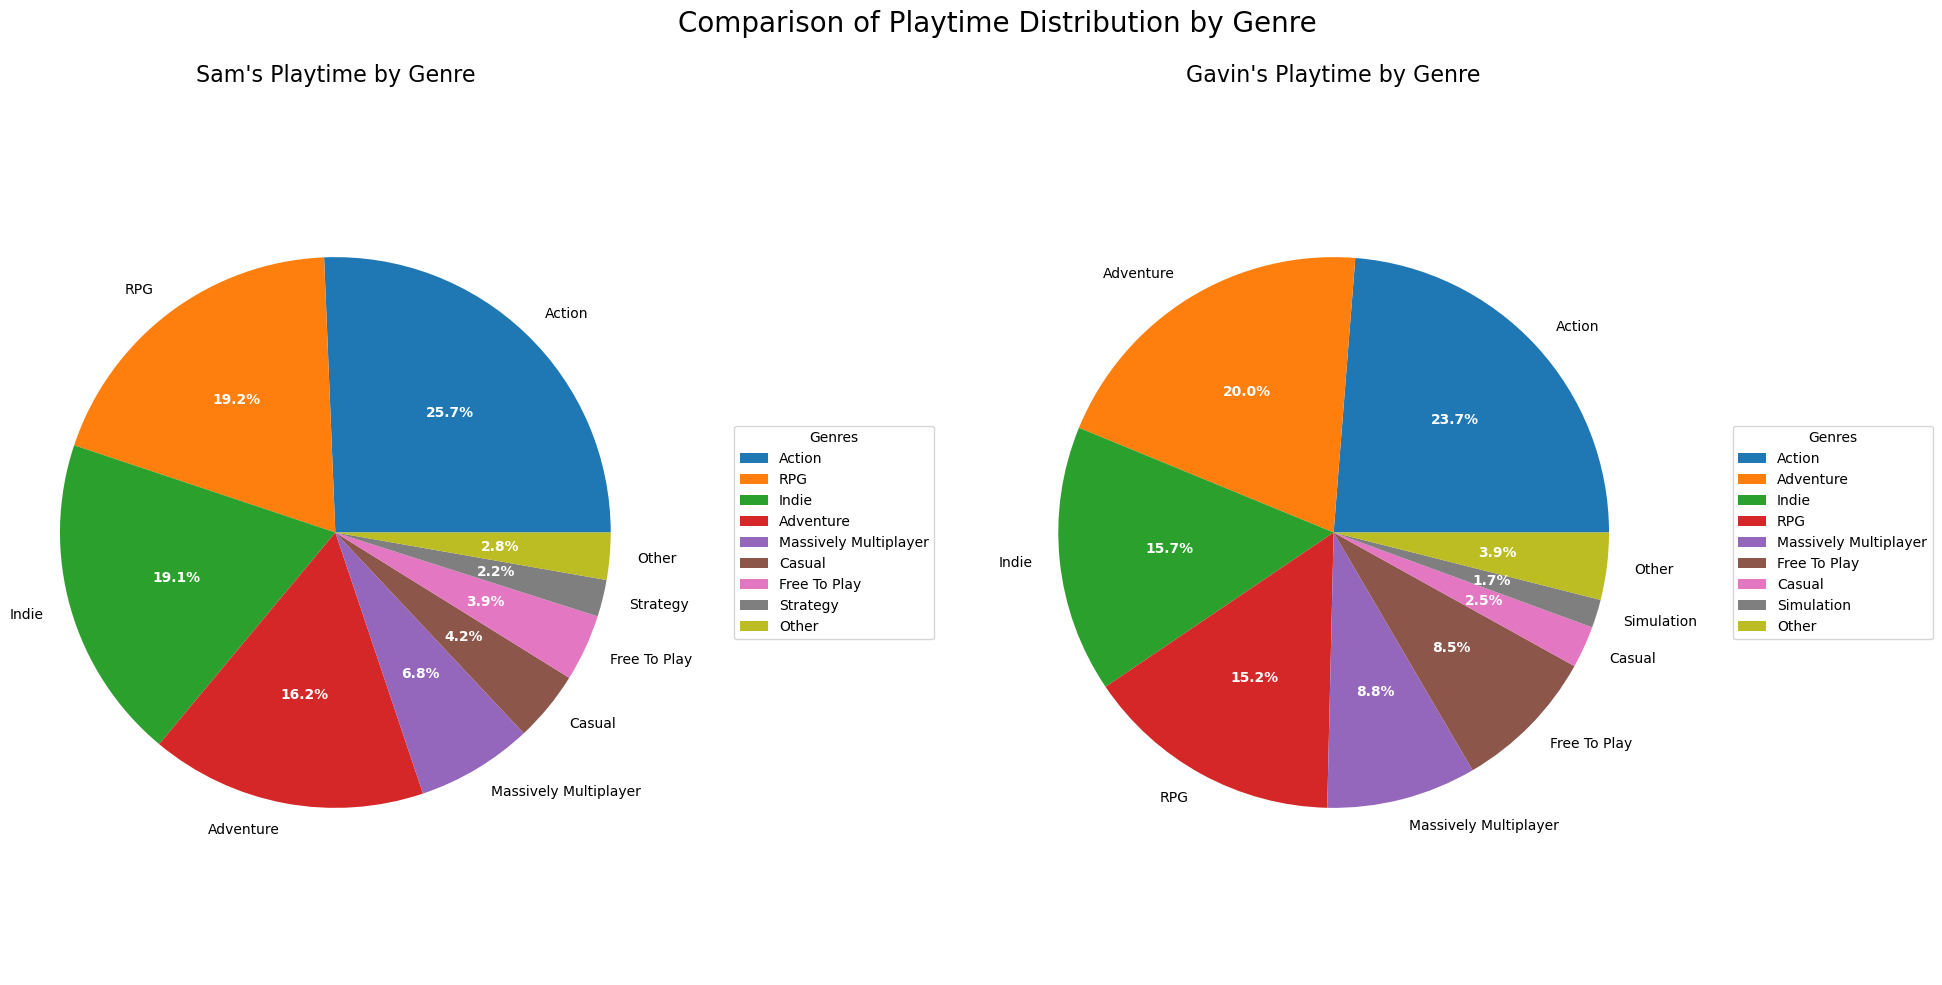

In [7]:
import matplotlib.pyplot as plt

# First we need to get the playtime to genre information summarized in a way that can be graphed (see utils for genre_playtime_summary code)
sam_genres = utils.genre_playtime_summary(df, 'playtime_forever_Sam')
gavin_genres = utils.genre_playtime_summary(df, 'playtime_forever_Gavin')

# Now we can create a figure with two subplots side by side, these will be both the graphs of our games
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Sam's pie chart
sam_wedges, sam_texts, sam_autotexts = ax1.pie(sam_genres['playtime_forever_Sam'], labels=sam_genres['Genre'], autopct='%1.1f%%')
ax1.set_title("Sam's Playtime by Genre", fontsize=16)
ax1.axis('equal')  # Equal aspect ratio

# Gavin's pie chart
gavin_wedges, gavin_texts, gavin_autotexts = ax2.pie(gavin_genres['playtime_forever_Gavin'], labels=gavin_genres['Genre'], autopct='%1.1f%%')
ax2.set_title("Gavin's Playtime by Genre", fontsize=16)
ax2.axis('equal')  # Equal aspect ratio

# Improve text visibility
for autotext in sam_autotexts + gavin_autotexts:
    autotext.set_fontsize(10)
    autotext.set_weight('bold')
    autotext.set_color('white')

# Add legend for each chart
ax1.legend(sam_genres['Genre'], title="Genres", loc="right", bbox_to_anchor=(1, 0, 0.5, 1))

ax2.legend(gavin_genres['Genre'], title="Genres", loc="right", bbox_to_anchor=(1, 0, 0.5, 1))

# Add a main title for the entire figure (encompasses both of the pie charts)
fig.suptitle('Comparison of Playtime Distribution by Genre', fontsize=20)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make room for the suptitle

# Show the charts
plt.show()


### Comparison of Playtime by Genre Pie Charts Explained

These graphs help us better understand how are playtimes across different genres are distributed, based on just some of our most played games we can see that Sam has more of his time spent then Gavin in some of the larger genre groups like Action and Adventure whereas Gavin has more of his time spent then sam in some of the smaller groups like Massively Multiplayer and Free To Play

This data is interesting but its not quite interesting enought to be the data we want to try and predict in our machine learning portion later.

So, we will move on to the next graph, comparing price to playtime:

### **Chart 2:**

The second chart we chose to create and analyze was (not sure what chart will be best to represent this yet (maybe a scatter plot or another double pie chart)

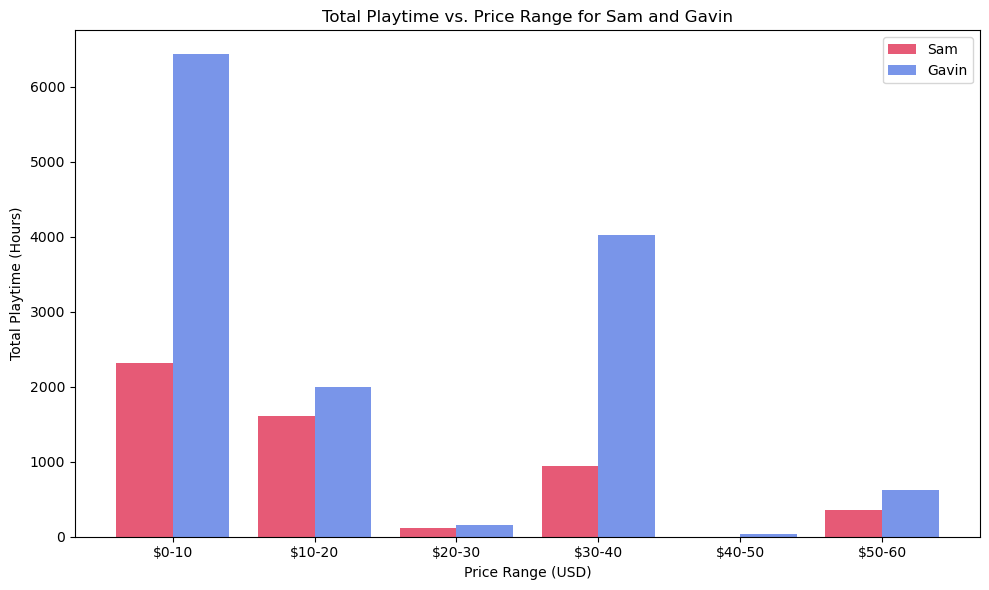

In [8]:
import numpy as np

# define the bins for the price ranges (0-10, 10-20, ... 50-60) where 0 represents a free game and 60 is the highest price of games (usually except for some that are like 70 nowadays)
bins = np.arange(0, 70, 10)  # Adjust the range and bin size as needed

# calculate the total playtime for Sam in each price range (sum all games in the same price ranfe then convert to hours)
sam_playtime_binned = []
for i in range(len(bins) - 1):
    lower_bound = bins[i] # ex: 0 for range 0-10
    upper_bound = bins[i+1] # ex: 10 for range 0-10
    # filter games within the price range and sum their playtime
    total_playtime = df.loc[(df['Price (USD $)'] >= lower_bound) & (df['Price (USD $)'] < upper_bound), 'playtime_forever_Sam'].sum() / 60 #convert to hours
    sam_playtime_binned.append(total_playtime)

# calculate the total playtime for Gavin now
gavin_playtime_binned = []
for i in range(len(bins) - 1):
    lower_bound = bins[i]
    upper_bound = bins[i+1]
    total_playtime = df.loc[(df['Price (USD $)'] >= lower_bound) & (df['Price (USD $)'] < upper_bound), 'playtime_forever_Gavin'].sum() / 60 # convert to hours
    gavin_playtime_binned.append(total_playtime)

# x-axis positions for the bars
x = bins[:-1]
# shift Sam's bars to the and gavin's bars to the right to keep them from overlapping
x_sam = x - 2 
x_gavin = x + 2   

# actually create the grouped bar chart here
plt.figure(figsize=(10, 6))
plt.bar(x_sam, sam_playtime_binned, width=4, label='Sam', color="crimson", alpha=0.7)
plt.bar(x_gavin, gavin_playtime_binned, width=4, label='Gavin', color="royalblue", alpha=0.7)

# add labels and title
plt.xlabel('Price Range (USD)')
plt.ylabel('Total Playtime (Hours)')
plt.title('Total Playtime vs. Price Range for Sam and Gavin')

#set the x-axis ticks and labels then show plot 
plt.xticks(x, [f'${start}-{start+10}' for start in bins[:-1]])
plt.legend()
plt.tight_layout()
plt.show()



### Analysis of Price to Playtime Chart

I think the most apparent point of data that can be seen from this new chart, is how much more total time Gavin has across all games played. 

We also found it very interesting how the most hours played vs. price category was the $0-10 price range, we believe this has to do with the recent shift in the games industry towards free to play models with in game purchases, rather than requesting upfront fees of $40-60+. Many of the games in that category either used to be paid for but shifted to be free, or have just been outright free for a long time now. The reason for this is that it allows for an easier bar of entry, to get players hooked, making them more likely to then pay for things like in game microtransactions, whereas if they saw the $60 upfront price tag, they may have never given the game a chance to begin with.

It is notable that there is still a good amount of time spent in the $30-40 range by Gavin especially, the games of this price tend to be story/singleplayer games that dont rely on a live service model and need to have the players pay upfront to be able to make a profitable amount of money

### Chart 3:

Now for our 3rd and final chart (the most interesting one), we chose to show and analyze the relationship between our own playtimes and the public reviews/sentiment of games on the store page. This will lead us into our later portion where we will use machine learning to predict what a games review/sentiment is based on the other attributes (like our playtime or the price)

Take a look:

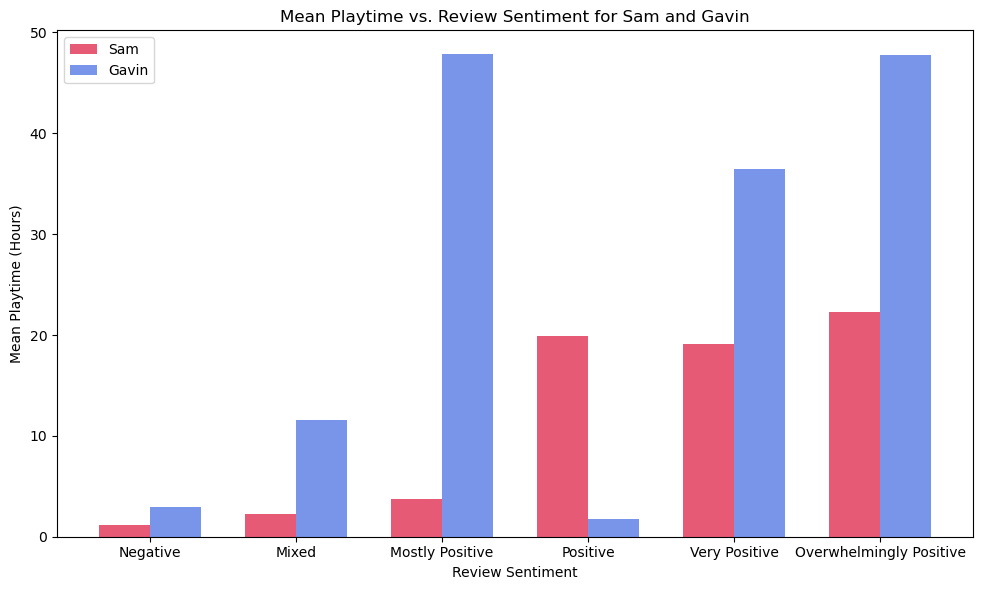

In [9]:
# clean the review score column
df_clean = df.dropna(subset=['Review Score']).copy()
df_clean = df_clean[df_clean['Review Score'] != 'No user reviews'].copy()

# quick function to convert review scores to numerical values
def score_to_num(score):
    if 'Overwhelmingly Positive' in score:
        return 6
    elif 'Very Positive' in score:
        return 5
    elif score == 'Positive':
        return 4
    elif score == 'Mostly Positive':
         return 3
    elif score == 'Mixed':
        return 2
    elif 'Negative' in score:  # this one includes all the negative reviews categories (like 'Mostly Negative', 'Very Negative', etc.)
        return 1
    else:
        return None  # other wise return None if there are any invalid values we are missing

df_clean['Review Score Numeric'] = df_clean['Review Score'].apply(score_to_num) # apply the function to convert the review score to a numeric value

# calculate mean playtime for both of our steam data for each review category
sam_playtime_by_score = df_clean.groupby('Review Score Numeric')['playtime_forever_Sam'].mean() / 60  # Convert to hours
gavin_playtime_by_score = df_clean.groupby('Review Score Numeric')['playtime_forever_Gavin'].mean() / 60 # Convert to hours

# this is to check that all categories are present, if missing we just fill with 0
all_scores = [1, 2, 3, 4, 5, 6]
sam_playtime_by_score = sam_playtime_by_score.reindex(all_scores, fill_value=0)
gavin_playtime_by_score = gavin_playtime_by_score.reindex(all_scores, fill_value=0)

# create x axis for positioning bars
x = np.arange(len(all_scores))

# create the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - 0.175, sam_playtime_by_score, width=0.35, label='Sam', color="crimson", alpha=0.7)
plt.bar(x + 0.175, gavin_playtime_by_score, width=0.35, label='Gavin', color="royalblue", alpha=0.7)

# add labels and title and x-axis ticks then show
plt.xlabel('Review Sentiment')
plt.ylabel('Mean Playtime (Hours)')
plt.title('Mean Playtime vs. Review Sentiment for Sam and Gavin')
plt.xticks(x, ['Negative', 'Mixed', 'Mostly Positive','Positive', 'Very Positive', 'Overwhelmingly Positive'])
plt.legend()
plt.tight_layout()
plt.show()

### Analysis of Personal Playtime to Public Reviews/Sentiment Chart

Great! This will be more useful as we can try and predict the review sentiment based on our own personal data. Some interesting findings to note from this graph are:

* The time played values of the 4 negative categories (Overwhelmingly Negative, Very Negative, Negative, and Mostly Negative) were not large enough to warrant having their own bars, instead we grouped them into one umbrella term 'Negative'
* As we can see the play time average went up as we increased the review sentiment fairly normally in Sam's data, however, Gavin does have a large spike in the Mostly Positive category, this is due to one Game that he has a vast majority of his hours played in, which throws the chart off from what you would expect.
* It is also interesting to see how little hours on average Gavin spends playing 'Positive' rated games

Now lets do some hypothesis tests,

and then after that we can move on to the machine learning and predictions! 😸

### Hypothesis Testing

For our final step of EDA we will be performing Hypothesis Testing

<img src="cat_images/scarycat.gif" alt="CatScary" width="200"/>

###### (Sam after doing his 1000th hypothesis test this week because of stats)

We are interested in whether the mean amount of playtime in minutes is different from each other. To test this, we will perform a 2-tailed, two sample test using the t-test method since the population standard deviation is unknown.

#### Step 1: Form our hypothesis  
$H_0: \mu_{sam} = \mu_{Gavin}$  
$H_1: \mu_{sam} \neq \mu_{Gavin}$  

#### Step 2: Select significance level  
$\alpha = 0.05$  

#### Step 3: Select test statistic  
$$t = \frac{\overline{x_1}-\overline{x_2}}{\sqrt{{{s_p}^2}}{(\frac{1}{n_1}+\frac{1}{n_2})}}$$  
where:
$${s_p}^2 = \frac{{(n_1-1)}{s_1}^2+{(n_2-1)}{s_2}^2}{n_1+n_2-2}$$

#### Step 4: Calculate test statistic

In [10]:
import scipy.stats as stats

t, pval = stats.ttest_ind(df["playtime_forever_Sam"], df["playtime_forever_Gavin"])
print(t, pval)

-1.6756946703217026 0.09412028952516287


#### Step 5: Interpret Results
Our results tell us:  
$p_{computed} < \alpha$  
so we reject $H_0$  

In other words, there is evidence to suggest that Sam and Gavin have differing average minutes of playtime across Steam.

### Machine Learning
We will test and compare four different classifier algorithms.

 * kNN Classifier
 * Decision Tree Classifier
 * Random Forest Classifier
 * Neural Network Classifier

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

df.head()

,Game,appid,playtime_forever_Sam,rtime_last_played_Sam,playtime_2weeks_Sam,playtime_forever_Gavin,rtime_last_played_Gavin,playtime_2weeks_Gavin,Genre,Price (USD $),Review Score,Total Positive Reviews,Total Negative Reviews
0,Rust,252490,56285.0,1.729369e+09,0.0,230031.0,1.736583e+09,0.0,"Action, Adventure, Indie, Massively Multiplaye...",39.99,Very Positive,885243.0,124415.0
1,Destiny 2,1085660,6822.0,1.728678e+09,0.0,149362.0,1.745990e+09,591.0,"Action, Adventure, Free To Play",0.00,Mostly Positive,100181.0,27456.0
2,Terraria,105600,57014.0,1.739931e+09,0.0,73027.0,1.745117e+09,5.0,"Action, Adventure, Indie, RPG",9.99,Overwhelmingly Positive,1088453.0,26250.0
3,Counter-Strike 2,730,4632.0,1.730015e+09,0.0,42660.0,1.644630e+09,0.0,"Action, Free To Play",0.00,Very Positive,3865716.0,615976.0
4,Tom Clancy's Rainbow Six Siege,359550,58551.0,1.712614e+09,0.0,39962.0,1.744437e+09,0.0,Action,19.99,Very Positive,998161.0,184203.0


In [12]:
df.dtypes

Game                        object
appid                        int64
playtime_forever_Sam       float64
rtime_last_played_Sam      float64
playtime_2weeks_Sam        float64
playtime_forever_Gavin     float64
rtime_last_played_Gavin    float64
playtime_2weeks_Gavin      float64
Genre                       object
Price (USD $)              float64
Review Score                object
Total Positive Reviews     float64
Total Negative Reviews     float64
dtype: object

#### Data Types
To prepare for our machine learning algorithm, we need to convert our Review Score to be a binary classification column with 0 representing reviews as favorable as 'mostly positve' or lower and 1 representing reviews more favorable than 'mostly positive'
 * Note: If we instead chose to split the review categories into negative from 'mixed' and lower, our dataset would simply be too skewed and we wouldn't have enough representation for our dataset. Me and Gavin mostly play games reviewed at the 'mostly positive' level or higher which leads to this issue.  

In [13]:
import numpy as np

df = df.dropna()
df = df.reset_index()

# Convert Review Score to numeric binary based on 'positive' or 'negative'
binary_review = df["Review Score"].str.lower().copy()

for i in range(len(binary_review)):
    row = binary_review[i]

    if ("negative" in row or "mixed" in row or "mostly positive" in row):
        binary_review[i] = 0
    elif ("positive" in row):
        binary_review[i] = 1
    else: 
        binary_review[i] = np.nan

df["Binary Review"] = binary_review

# Drop any rows filled with nan
df = df.dropna()
df = df.reset_index()

# Convert column to numeric
df["Binary Review"] = pd.to_numeric(df["Binary Review"])

df.head()

,level_0,index,Game,appid,playtime_forever_Sam,rtime_last_played_Sam,playtime_2weeks_Sam,playtime_forever_Gavin,rtime_last_played_Gavin,playtime_2weeks_Gavin,Genre,Price (USD $),Review Score,Total Positive Reviews,Total Negative Reviews,Binary Review
0,0,0,Rust,252490,56285.0,1.729369e+09,0.0,230031.0,1.736583e+09,0.0,"Action, Adventure, Indie, Massively Multiplaye...",39.99,Very Positive,885243.0,124415.0,1
1,1,1,Destiny 2,1085660,6822.0,1.728678e+09,0.0,149362.0,1.745990e+09,591.0,"Action, Adventure, Free To Play",0.00,Mostly Positive,100181.0,27456.0,0
2,2,2,Terraria,105600,57014.0,1.739931e+09,0.0,73027.0,1.745117e+09,5.0,"Action, Adventure, Indie, RPG",9.99,Overwhelmingly Positive,1088453.0,26250.0,1
3,3,3,Counter-Strike 2,730,4632.0,1.730015e+09,0.0,42660.0,1.644630e+09,0.0,"Action, Free To Play",0.00,Very Positive,3865716.0,615976.0,1
4,4,4,Tom Clancy's Rainbow Six Siege,359550,58551.0,1.712614e+09,0.0,39962.0,1.744437e+09,0.0,Action,19.99,Very Positive,998161.0,184203.0,1


In [14]:
df.dtypes

level_0                      int64
index                        int64
Game                        object
appid                        int64
playtime_forever_Sam       float64
rtime_last_played_Sam      float64
playtime_2weeks_Sam        float64
playtime_forever_Gavin     float64
rtime_last_played_Gavin    float64
playtime_2weeks_Gavin      float64
Genre                       object
Price (USD $)              float64
Review Score                object
Total Positive Reviews     float64
Total Negative Reviews     float64
Binary Review                int64
dtype: object

In [15]:
df.shape

(176, 16)

In [16]:
X = df[["playtime_forever_Sam", "rtime_last_played_Sam", "playtime_2weeks_Sam", "playtime_forever_Gavin", "rtime_last_played_Gavin", "playtime_2weeks_Gavin", "Price (USD $)"]]
y=df["Binary Review"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
scaler = StandardScaler()
# Model actually performs worse with scaler fit_transform
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("KNN Accuracy: ", acc)

KNN Accuracy:  0.6818181818181818


In [17]:
combined = pd.DataFrame(dict(actual=y_test, predicted=y_pred))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,6,7
1,7,24


In [18]:
decision_tree_clf = DecisionTreeClassifier(max_depth=2, random_state=0)
decision_tree_clf.fit(X_train, y_train)
dt_y_pred = decision_tree_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_y_pred)
print("Decision Tree Accuracy: ", dt_acc)

Decision Tree Accuracy:  0.7045454545454546


In [19]:
combined = pd.DataFrame(dict(actual=y_test, predicted=dt_y_pred))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,8,5
1,8,23


In [20]:
random_forest_clf = RandomForestClassifier(n_estimators=1, random_state=0)
random_forest_clf.fit(X_train, y_train)
rf_pred = random_forest_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy: ", rf_acc)

Random Forest Accuracy:  0.7727272727272727


In [21]:
combined = pd.DataFrame(dict(actual=y_test, predicted=rf_pred))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,9,4
1,6,25


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Convert series to numpy arrays for neural network processing
X_train_scaled = np.array(X_train_scaled)
X_test_scaled = np.array(X_test_scaled)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Convert to PyTorch Tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

# Create model using sequential type neural network for classification
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(32, 2)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
batch_size = 25

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if ((epoch+1) % 5 == 0):
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

model.eval()

with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_test_tensor).sum().item()
    total = y_test_tensor.size(0)
    nn_acc = correct/total
    nn_pred = predicted.cpu().numpy()

print(f"Neural Network Accuracy: {nn_acc}")

Epoch 5/50, Loss: 0.7447747588157654
Epoch 10/50, Loss: 0.7104904055595398
Epoch 15/50, Loss: 0.6753348708152771
Epoch 20/50, Loss: 0.6641662120819092
Epoch 25/50, Loss: 0.6431827545166016
Epoch 30/50, Loss: 0.6360059380531311
Epoch 35/50, Loss: 0.622901439666748
Epoch 40/50, Loss: 0.6147739291191101
Epoch 45/50, Loss: 0.5939322710037231
Epoch 50/50, Loss: 0.5954567193984985
Neural Network Accuracy: 0.75


In [23]:
combined = pd.DataFrame(dict(actual=y_test, predicted=nn_pred))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,9,4
1,7,24


In [24]:
print("Training data class distribution:")
print(pd.Series(y_train).value_counts(normalize=True))

print("\nTest data class distribution:")
print(pd.Series(y_test).value_counts(normalize=True))

Training data class distribution:
1    0.628788
0    0.371212
Name: proportion, dtype: float64

Test data class distribution:
1    0.704545
0    0.295455
Name: proportion, dtype: float64


### Classification Results

We predicted the general review sentiment of a game based on our personal playtimes. Our prediction method was split into our negative class being reviews at the "mostly positive" level or below. Reviews categorized as positive were at the "positive" level and higher.  

Our data set had the following splits:
 * Training Set:
    * Percent of Positives: 62.88%
    * Percent of Negatives: 37.12%
 * Testing Set:
    * Percent of Positives: 70.45%
    * Percent of Negatives: 29.55%

Below, we will compare the overall accuracies of each model. Then, we will also compare their True Positive Rates (TPR) vs. their True Negative Rates (TNR).
 * TPR: Calculated by dividing number of true positives by number of false negatives
 * TNR: Calculated by dividing number of true negatives by number of false positives


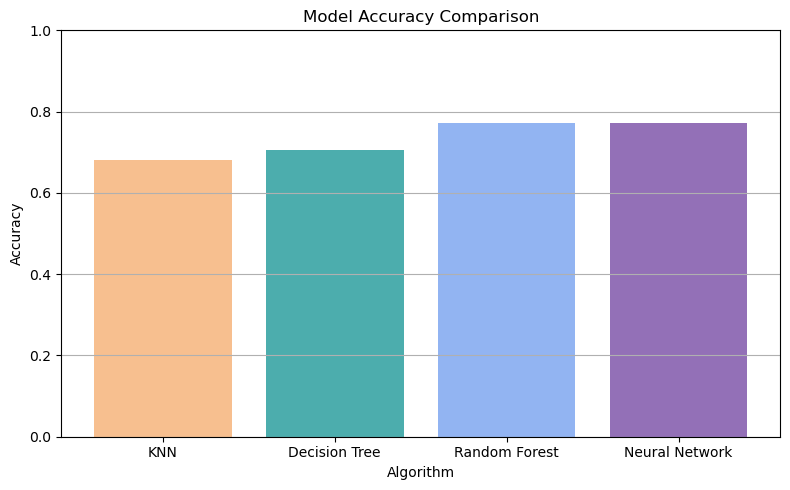

In [25]:
import matplotlib.pyplot as plt

# Plot the overall accuracies of each algorithm
algorithms = ['KNN', 'Decision Tree', 'Random Forest', 'Neural Network']
accuracies = [0.6818, 0.7045, 0.7727, 0.7727] 

plt.figure(figsize=(8, 5))
plt.bar(algorithms, accuracies, color=['sandybrown', 'darkcyan', 'cornflowerblue', 'rebeccapurple'], alpha=0.7)
plt.title('Model Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.grid(axis='y', linestyle='-')

plt.tight_layout()
plt.show()


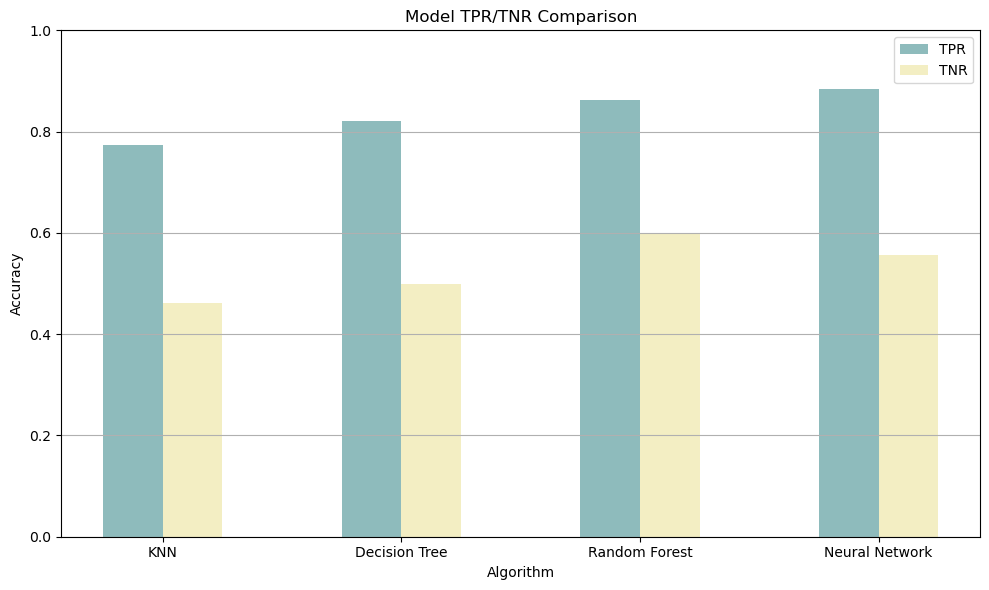

In [26]:
# Plot the accuracy of true positive vs true negative of each algorithm
bar_width = 0.25

x = np.arange(4)

pos_acc = [24/31, 23/28, 25/29, 23/26] 
neg_acc = [6/13, 8/16, 9/15, 10/18]

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, pos_acc, width=bar_width, label='TPR', alpha=0.7, color="cadetblue")
plt.bar(x + bar_width/2, neg_acc, width=bar_width, label='TNR', alpha=0.7, color="palegoldenrod")

algorithms = ['KNN', 'Decision Tree', 'Random Forest', 'Neural Network']

plt.title('Model TPR/TNR Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.xticks(ticks=[0, 1, 2, 3], labels=algorithms)
plt.grid(axis='y', linestyle='-')
plt.legend()

plt.tight_layout()
plt.show()

#### Interpretation of Results

From the graphs, we can see that the Decision Tree algorithm performed significantly worse than our KNN algorithm. Additionally, we can see that our Neural Network and Random Forest were our best performers. 

A couple of challenges we experienced with our classification algorithms are:
 * Negative representation: In our dataset, we really don't have that much representation of negative review sentiments for the games we both play. This lead to the models always predicting positive when we set the negatives to be reviews categorized as "mixed" or worse. 
    * Solution: We set our reviews categorized as negative to be from "mostly positive" or worse. This allowed us to have a little more representation for worsely reviewed games.
 * Decision Tree HyperParameterization: Initially, our decision tree was the worst performing algorithm by far. It had an accuracy of roughly 31%.
    * Solution: We finetuned the parameters of the decision tree algorithm. Specifically, we set the max_depth to be lower than the default which raised the accuracy enormously.